In [14]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, validation_curve
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import urllib.request




In [15]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Shemeazza/ML4DS-D/main/"
WATER_BILL_PATH = os.path.join("datasets", "Water Bill")
WATER_BILL_URL = DOWNLOAD_ROOT + WATER_BILL_PATH 


def fetch_water_bill_data(water_bill_url=WATER_BILL_URL, water_bill_path=WATER_BILL_PATH):
    if not os.path.isdir(water_bill_path):
        os.makedirs(water_bill_path)
        urllib.request.urlretrieve(water_bill_url, csv_path)    

def load_training_data(water_bill_path=WATER_BILL_PATH):
    csv_path = os.path.join(water_bill_path, "train.csv")
    return pd.read_csv(csv_path)

train_data = load_training_data()


In [16]:
train_data.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2


In [17]:

# train_data = pd.read_csv(train_data_path)

train_data['YearMonth'] = train_data['Year'].astype(str) + train_data['Month'].astype(str).str.zfill(2)


x = train_data[['YearMonth', 'Consumption', 'Installation_zone']]
y = train_data['Consumer_type']



In [18]:
train_data.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone,YearMonth
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1,201301
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2,201301
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2,201301
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2,201301
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2,201301


In [19]:
%matplotlib inline

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300 ):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)    


In [20]:
encoded_labels = OrdinalEncoder().set_output(transform="pandas")

x = encoded_labels.set_params(encoded_missing_value=-1).fit_transform(x)


print(x)  

        YearMonth  Consumption  Installation_zone
0             0.0          0.0                0.0
1             0.0          5.0               11.0
2             0.0          6.0               11.0
3             0.0          1.0               11.0
4             0.0         13.0               11.0
...           ...          ...                ...
329970       83.0          0.0               11.0
329971       83.0          0.0               41.0
329972       83.0          0.0               46.0
329973       83.0          0.0               25.0
329974       83.0         14.0                0.0

[329975 rows x 3 columns]


In [21]:



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)


(263980, 3)
(65995, 3)


In [22]:
y.head(20000000)

0               domestic
1             industrial
2               domestic
3               domestic
4               domestic
               ...      
329970          domestic
329971    rural domestic
329972    rural domestic
329973    rural domestic
329974          domestic
Name: Consumer_type, Length: 329975, dtype: object

[Text(0.5490131578947368, 0.9375, 'x[2] <= 33.5\ngini = 0.446\nsamples = 263980\nvalue = [1759, 189043, 16813, 807, 4472, 50392, 694]'),
 Text(0.2901315789473684, 0.8125, 'x[2] <= 0.5\ngini = 0.383\nsamples = 245088\nvalue = [1579, 189039, 16783, 793, 4472, 31984, 438]'),
 Text(0.16447368421052633, 0.6875, 'x[1] <= 28.5\ngini = 0.101\nsamples = 61959\nvalue = [184, 58695, 2778, 260, 42, 0, 0]'),
 Text(0.08421052631578947, 0.5625, 'x[1] <= 2.5\ngini = 0.094\nsamples = 61413\nvalue = [169, 58385, 2563, 254, 42, 0, 0]'),
 Text(0.042105263157894736, 0.4375, 'x[1] <= 0.5\ngini = 0.178\nsamples = 16070\nvalue = [95, 14501, 1402, 42, 30, 0, 0]'),
 Text(0.021052631578947368, 0.3125, 'x[0] <= 57.5\ngini = 0.14\nsamples = 8963\nvalue = [81, 8293, 544, 22, 23, 0, 0]'),
 Text(0.010526315789473684, 0.1875, 'x[0] <= 43.5\ngini = 0.121\nsamples = 6301\nvalue = [44, 5897, 336, 15, 9, 0, 0]'),
 Text(0.005263157894736842, 0.0625, '\n  (...)  \n'),
 Text(0.015789473684210527, 0.0625, '\n  (...)  \n'),
 T

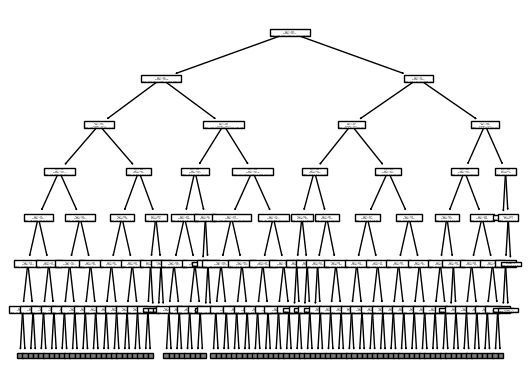

In [23]:
model = tree.DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
y_test_pred = model.predict(x_test)
plt.figure(figsize=1000,dpi=1000)
tree.plot_tree(model, max_depth = 6)

In [24]:
acc_test = accuracy_score(y_test, y_test_pred)
print("Model Acc:", acc_test)



Model Acc: 0.9061444048791575


In [25]:
def load_competition_data(water_bill_path=WATER_BILL_PATH):
    csv_path = os.path.join(water_bill_path, "competition.csv")
    return pd.read_csv(csv_path)

In [26]:
competition_data = load_competition_data()
competition_data.head()


,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3


In [27]:
competition_data['YearMonth'] = competition_data['Year'].astype(str) + competition_data['Month'].astype(str).str.zfill(2)
x_comp = competition_data[['YearMonth', 'Consumption','Installation_zone']]
x_comp = encoded_labels.fit_transform(x_comp)

In [28]:
print(x_comp)
print(competition_data)

       YearMonth  Consumption  Installation_zone
0            0.0          1.0                0.0
1            0.0          2.0                0.0
2            0.0          1.0                0.0
3            0.0          5.0               22.0
4            0.0         14.0               22.0
...          ...          ...                ...
18274       83.0          0.0               18.0
18275       83.0          0.0                8.0
18276       83.0          0.0               38.0
18277       83.0          0.0               11.0
18278       83.0          0.0               28.0

[18279 rows x 3 columns]
       Year  Month  Consumption     Consumer_number     Installation_zone  \
0      2013      1            1  VENX08444954462680   Installation_zone 1   
1      2013      1            2  GRXC33020746550125   Installation_zone 1   
2      2013      1            1  FCGQ19814303536339   Installation_zone 1   
3      2013      1            5  EQKL85694875580467   Installation_zone 3   
4

In [29]:

missing = set(x_train.columns) - set(x_comp.columns)
if missing:
    raise ValueError(f"Missing features: {missing}")


In [30]:
prediction = model.predict(x_comp)

competition_data['Consumer_type'] = prediction

unique_predictions = competition_data.groupby('Consumer_number')['Consumer_type'].agg(lambda x: x.mode()[0]).reset_index()


results_data = pd.DataFrame({
    'Consumer_number': unique_predictions['Consumer_number'],
    'Consumer_type': unique_predictions['Consumer_type']
})

In [31]:
results_data.to_csv("predicted_results.csv", index=False)
